In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [26]:
# Iris dataset
print("\n1. IRIS DATASET (150 samples, 4 features)")
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

pca_iris = PCA()
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)


1. IRIS DATASET (150 samples, 4 features)


In [27]:
print("  Original: 150 x 4")
print("  Explained variance ratio: {}".format(
    ["{:.1%}".format(v) for v in pca_iris.explained_variance_ratio_]))
print("  Cumulative: {}".format(
    ["{:.1%}".format(sum(pca_iris.explained_variance_ratio_[:i+1])) 
     for i in range(len(pca_iris.explained_variance_ratio_))]))

  Original: 150 x 4
  Explained variance ratio: ['73.0%', '22.9%', '3.7%', '0.5%']
  Cumulative: ['73.0%', '95.8%', '99.5%', '100.0%']


In [28]:
pca_iris_2 = PCA(n_components=2)
X_iris_2d = pca_iris_2.fit_transform(X_iris_scaled)
print("  PCA(2): 150 x 2 ({:.1%} variance)".format(
    sum(pca_iris_2.explained_variance_ratio_)))

  PCA(2): 150 x 2 (95.8% variance)


In [29]:
pca_iris_3 = PCA(n_components=3)
X_iris_3d = pca_iris_3.fit_transform(X_iris_scaled)
print("  PCA(3): 150 x 3 ({:.1%} variance)".format(
    sum(pca_iris_3.explained_variance_ratio_)))

  PCA(3): 150 x 3 (99.5% variance)


In [30]:
# Clustering tren PCA
kmeans_iris_2 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_iris_2 = kmeans_iris_2.fit_predict(X_iris_2d)

kmeans_iris_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_iris_3 = kmeans_iris_3.fit_predict(X_iris_3d)

Ví dụ về phân cụm các chữ số

In [31]:
# Digits dataset
print("\n2. DIGITS DATASET (1797 samples, 64 features)")
digits_data = load_digits()
X_digits = digits_data.data

X_digits_scaled = StandardScaler().fit_transform(X_digits)

pca_digits = PCA()
X_digits_pca = pca_digits.fit_transform(X_digits_scaled)

print("  Original: 1797 x 64")
print("  First 5 PCA variances: {}".format(
    ["{:.1%}".format(v) for v in pca_digits.explained_variance_ratio_[:5]]))
print("  Cumulative (first 10): {:.1%}".format(
    sum(pca_digits.explained_variance_ratio_[:10])))


2. DIGITS DATASET (1797 samples, 64 features)
  Original: 1797 x 64
  First 5 PCA variances: ['12.0%', '9.6%', '8.4%', '6.5%', '4.9%']
  Cumulative (first 10): 58.9%


In [32]:
pca_digits_10 = PCA(n_components=10)
X_digits_10d = pca_digits_10.fit_transform(X_digits_scaled)
print("  PCA(10): 1797 x 10 ({:.1%} variance)".format(
    sum(pca_digits_10.explained_variance_ratio_)))

pca_digits_20 = PCA(n_components=20)
X_digits_20d = pca_digits_20.fit_transform(X_digits_scaled)
print("  PCA(20): 1797 x 20 ({:.1%} variance)".format(
    sum(pca_digits_20.explained_variance_ratio_)))

  PCA(10): 1797 x 10 (58.9% variance)
  PCA(20): 1797 x 20 (79.3% variance)


In [33]:
# Clustering tren PCA
kmeans_digits_10 = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_digits_10 = kmeans_digits_10.fit_predict(X_digits_10d)

kmeans_digits_20 = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_digits_20 = kmeans_digits_20.fit_predict(X_digits_20d)

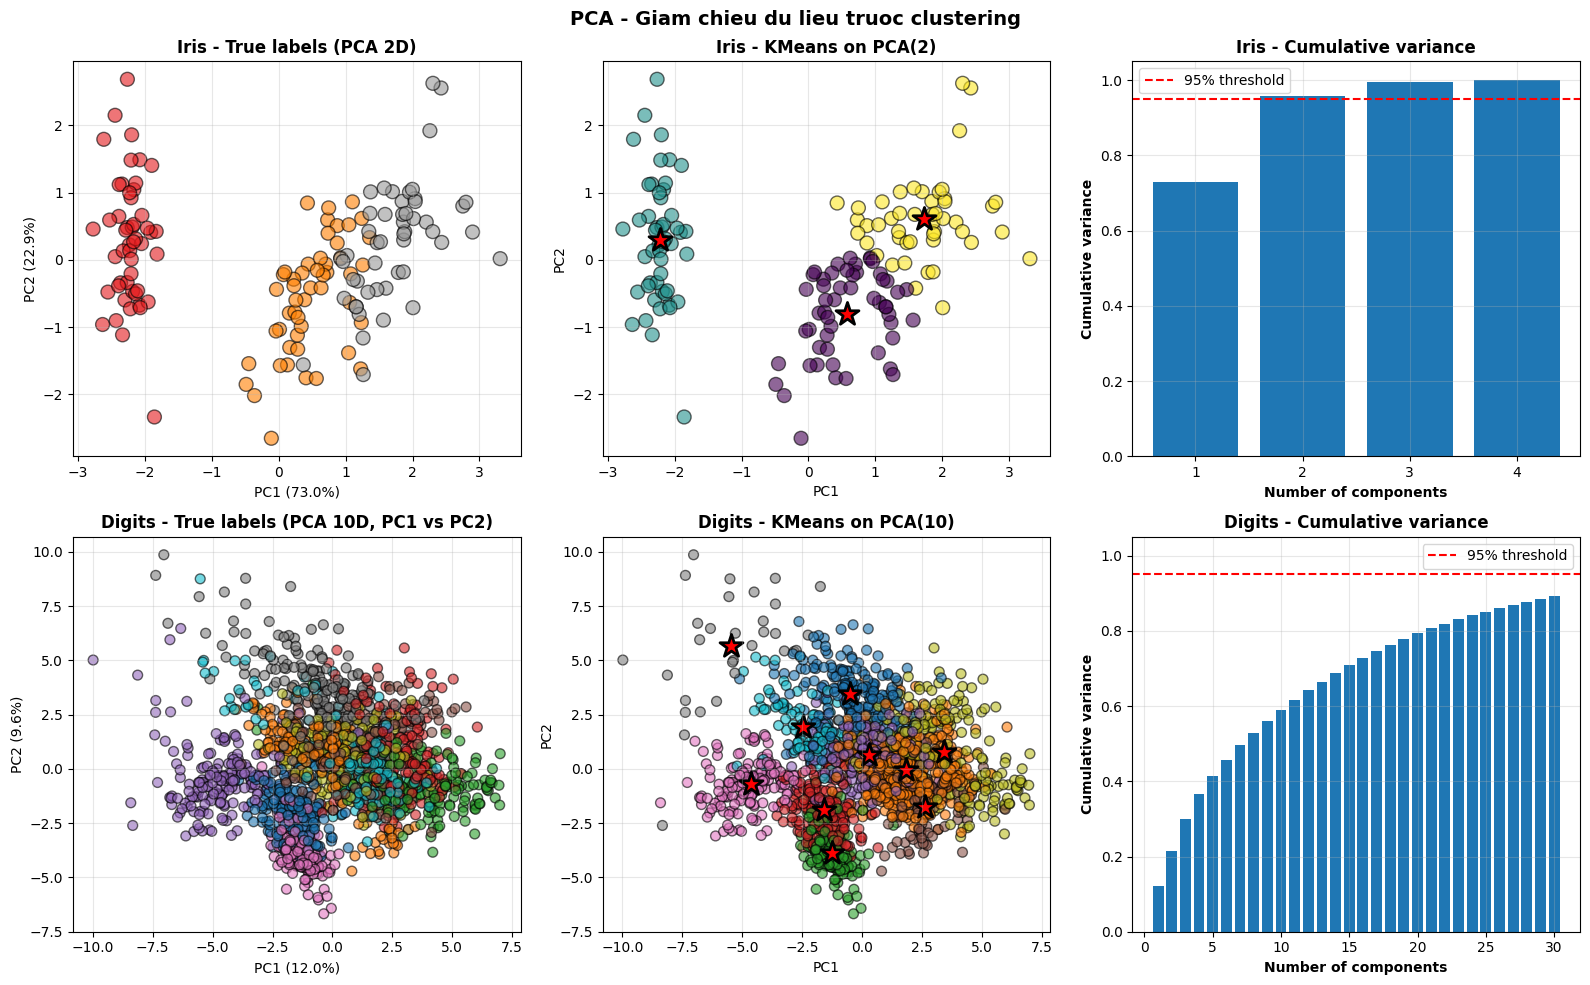

In [34]:
# Ve hinh
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('PCA - Giam chieu du lieu truoc clustering', fontsize=14, fontweight='bold')

# Iris
ax1 = axes[0, 0]
scatter1 = ax1.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, cmap='Set1', s=100, alpha=0.6, edgecolors='k')
ax1.set_title('Iris - True labels (PCA 2D)', fontweight='bold')
ax1.set_xlabel('PC1 ({:.1%})'.format(pca_iris_2.explained_variance_ratio_[0]))
ax1.set_ylabel('PC2 ({:.1%})'.format(pca_iris_2.explained_variance_ratio_[1]))
ax1.grid(alpha=0.3)

ax2 = axes[0, 1]
scatter2 = ax2.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=labels_iris_2, cmap='viridis', s=100, alpha=0.6, edgecolors='k')
ax2.scatter(kmeans_iris_2.cluster_centers_[:, 0], kmeans_iris_2.cluster_centers_[:, 1], 
           c='red', s=300, marker='*', edgecolors='black', linewidths=2)
ax2.set_title('Iris - KMeans on PCA(2)', fontweight='bold')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.grid(alpha=0.3)

ax3 = axes[0, 2]
ax3.bar(range(1, 5), np.cumsum(pca_iris.explained_variance_ratio_))
ax3.axhline(0.95, color='red', linestyle='--', label='95% threshold')
ax3.set_xlabel('Number of components', fontweight='bold')
ax3.set_ylabel('Cumulative variance', fontweight='bold')
ax3.set_title('Iris - Cumulative variance', fontweight='bold')
ax3.set_xticks(range(1, 5))
ax3.set_ylim(0, 1.05)
ax3.legend()
ax3.grid(alpha=0.3)

# Digits
ax4 = axes[1, 0]
scatter4 = ax4.scatter(X_digits_10d[:, 0], X_digits_10d[:, 1], c=digits_data.target, cmap='tab10', s=50, alpha=0.6, edgecolors='k')
ax4.set_title('Digits - True labels (PCA 10D, PC1 vs PC2)', fontweight='bold')
ax4.set_xlabel('PC1 ({:.1%})'.format(pca_digits_10.explained_variance_ratio_[0]))
ax4.set_ylabel('PC2 ({:.1%})'.format(pca_digits_10.explained_variance_ratio_[1]))
ax4.grid(alpha=0.3)

ax5 = axes[1, 1]
scatter5 = ax5.scatter(X_digits_10d[:, 0], X_digits_10d[:, 1], c=labels_digits_10, cmap='tab10', s=50, alpha=0.6, edgecolors='k')
ax5.scatter(kmeans_digits_10.cluster_centers_[:, 0], kmeans_digits_10.cluster_centers_[:, 1], 
           c='red', s=300, marker='*', edgecolors='black', linewidths=2)
ax5.set_title('Digits - KMeans on PCA(10)', fontweight='bold')
ax5.set_xlabel('PC1')
ax5.set_ylabel('PC2')
ax5.grid(alpha=0.3)

ax6 = axes[1, 2]
ax6.bar(range(1, 31), np.cumsum(pca_digits.explained_variance_ratio_[:30]))
ax6.axhline(0.95, color='red', linestyle='--', label='95% threshold')
ax6.set_xlabel('Number of components', fontweight='bold')
ax6.set_ylabel('Cumulative variance', fontweight='bold')
ax6.set_title('Digits - Cumulative variance', fontweight='bold')
ax6.set_ylim(0, 1.05)
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()
